# <h1><center>Spatial Operations</center></h1>

## 1 - Overlay Analysis

We sometimes need to create new features out of different data types like Points, Lines and Polygons. Set operations or Overlays play an important role here.


### Learning Objectives:

1. Understand spatial overlays.
2. Create dataset from intersection of two data.

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from pyproj import Proj

We will be using available data from Geopandas here.. This example comes from Geopandas documentation.

In [2]:
# Let us see what data is available in Geopandas
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [8]:
# Read from the geopandas dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
capitals = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

capitals.head()


,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


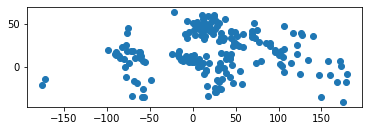

In [9]:
capitals.plot();

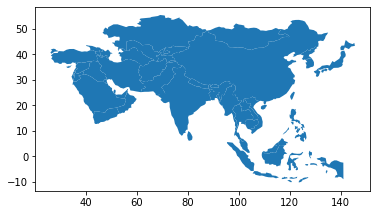

In [10]:
# Select Africa
asia = world[world['continent'] == "Asia"]
asia = asia[['geometry', 'name']]

asia.plot();

In [11]:
# Project to crs that uses meters as distance measure
asia = asia.to_crs("epsg:3395") 
capitals = capitals.to_crs("epsg:3395")

In [14]:
capitals.head()

,name,geometry
0,Vatican City,POINT (1386304.649 5117957.424)
1,San Marino,POINT (1385011.519 5425900.277)
2,Vaduz,POINT (1059390.800 5932596.001)
3,Luxembourg,POINT (682388.791 6346728.171)
4,Palikir,POINT (17605174.611 766692.137)


In [15]:
# make 500km buffer
capitals['geometry']= capitals.buffer(500000)
capitals.head()

,name,geometry
0,Vatican City,"POLYGON ((1886304.649 5117957.424, 1883897.012..."
1,San Marino,"POLYGON ((1885011.519 5425900.277, 1882603.882..."
2,Vaduz,"POLYGON ((1559390.800 5932596.001, 1556983.163..."
3,Luxembourg,"POLYGON ((1182388.791 6346728.171, 1179981.154..."
4,Palikir,"POLYGON ((18105174.611 766692.137, 18102766.97..."


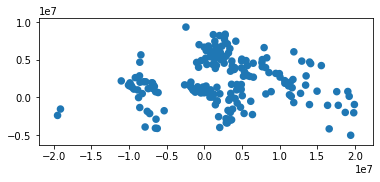

In [16]:
capitals.plot();

* Intersection

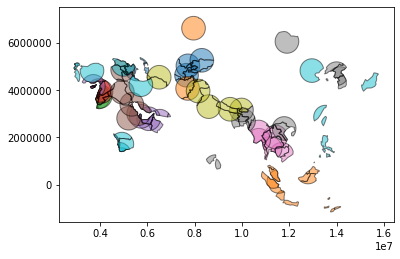

In [17]:
asia_cores = gpd.overlay(asia, capitals, how='intersection')

asia_cores.plot(alpha=0.5, edgecolor='k', cmap='tab10');

* Difference

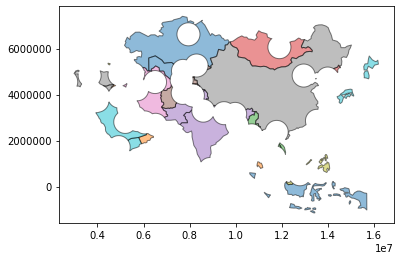

In [18]:
asia_peripheries = gpd.overlay(asia, capitals, how='difference')

asia_peripheries.plot(alpha=0.5, edgecolor='k', cmap='tab10');

**Recap**
* `.overlay()` --> The overlay function will determine the set of all individual geometries from overlaying the two input GeoDataFrames
* `.buffer()` --> Calculates a circle buffer around the point and you can change a Point geometry into a polygon geometry.
